# Neuropixels 1.0

author: steeve.laquitaine@epfl.ch  
date: 22.08.2023  
last modified: 18.01.2024  

The probe is reconstructed by the `src.nodes.dataeng.silico.probe_wiring.wire_silico_marques_probe()` function.

## Setup 

Create and activate `npx_10m_384ch_unit_classes`

In [5]:
# SET PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import spikeinterface as si
import MEAutility as MEA

pd.set_option('display.max_colwidth', None)

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"

os.chdir(PROJ_PATH)
from src.nodes.utils import get_config
from src.nodes.load import load_campaign_params
from src.nodes.dataeng.silico.filtering import filter_microcircuit_cells

# SETUP CONFIG
data_conf, param_conf = get_config("silico_neuropixels", "concatenated").values()
WIRED_PATH = data_conf["probe_wiring"]["output"]

2024-03-15 18:22:41,383 - root - utils.py - get_config - INFO - Reading experiment config.
2024-03-15 18:22:41,458 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Describe the probe geometry

In [6]:
params = MEA.return_mea_info("Neuropixels-384")
params

{'electrode_name': 'Neuropixels-384',
 'description': 'Neuropixels probe. 384 square contacts in 4 staggered columns.',
 'sortlist': None,
 'pitch': [40.0, 16.0],
 'dim': [96, 4],
 'stagger': 20,
 'size': 6.0,
 'plane': 'yz',
 'shape': 'square',
 'type': 'mea'}

In [8]:
# calculate other geometrical features
# 4 rows separated by 16 microns
shank_width = (4 - 1) * 16
print("probe shank width (center to center):", shank_width, "microns")

# calculate measures on illustrator figures
# 12.46 mm <-> 460 microns wide cortical column

print("shank width (center to center):", shank_width * 12.46 / 460, "mm")
print("electrode size:", params["size"] * 12.46 / 460, "mm")
print("y pitch:", params["pitch"][0] * 12.46 / 460, "mm")
print("x pitch:", params["pitch"][1] * 12.46 / 460, "mm")
print("stagger:", params["stagger"] * 12.46 / 460, "mm")

probe shank width (center to center): 48 microns
shank width (center to center): 1.3001739130434784 mm
electrode size: 0.1625217391304348 mm
y pitch: 1.0834782608695652 mm
x pitch: 0.43339130434782613 mm
stagger: 0.5417391304347826 mm


In [9]:
3 * 1.3
0.16 * 3
0.54 * 3
1.08 * 3

1.62

### Describe the sites in cortex

In [20]:
Recording = si.load_extractor(WIRED_PATH)
Recording.get_property("layers")

array(['Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'L6', 'L6',
       'L6', 'L6', 'L6', 'L6', 'L6', 'L6', 'L6', 'L6', 'L6', 'L6', 'L6',
       'L6', 'L6', 'L6', 'L6', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5',
       'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L4', 'L4', 'L4', 'L4', 'L4',
       'L3', 'L3', 'L3', 'L3', 'L3', 'L3', 'L3', 'L3', 'L3', 'L2', 'L2',
       'L1', 'L1', 'L1', 'L1', 'Outside', 'Outside', 'Outside', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside', 'Outside', 'Outside',
       'Outside', 'Outside', 'Outside', 'Outside

### Check against our ProbeInterface reconstruction

In [107]:
# 40 secs
# wire recording with probe
print("channel ids:", Recording.get_channel_ids())

# contact ids are empty. In Kilosort3 they are ordered with the coordinates rows and assigned labels 1:384
# get contact coordinates
Probe = Recording.get_probe()
print("contact ids:", Probe.contact_ids)
contact_ids = np.arange(0, 384, 1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [46]:
# print contacts in cortex
Probe.contact_ids[Recording.get_property("layers") != "Outside"]

array(['23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '118', '119', '120', '121',
       '122', '123', '124', '125', '126', '127', '128', '129', '130',
       '131', '132', '133', '134', '135', '136', '137', '138', '139',
       '140', '141', '142', '143', '144', '145', '146', '147', '148',
       '149', '150', '151', '152', '153', '154', '155', '156', '157',
       '158', '159', '160', '161', '162', '163', '164', '165', '166',
       '167', '168', '215', '216', '217', '218', '219', '220', '221',
       '222', '223', '224', '225', '226', '227', '228', '229', '230',
       '231', '232', '233', '234', '235', '236', '237', '238', '239',
       '240', '241', '242', '243', '244', '245', '246', '247', '248',
       

### Plot

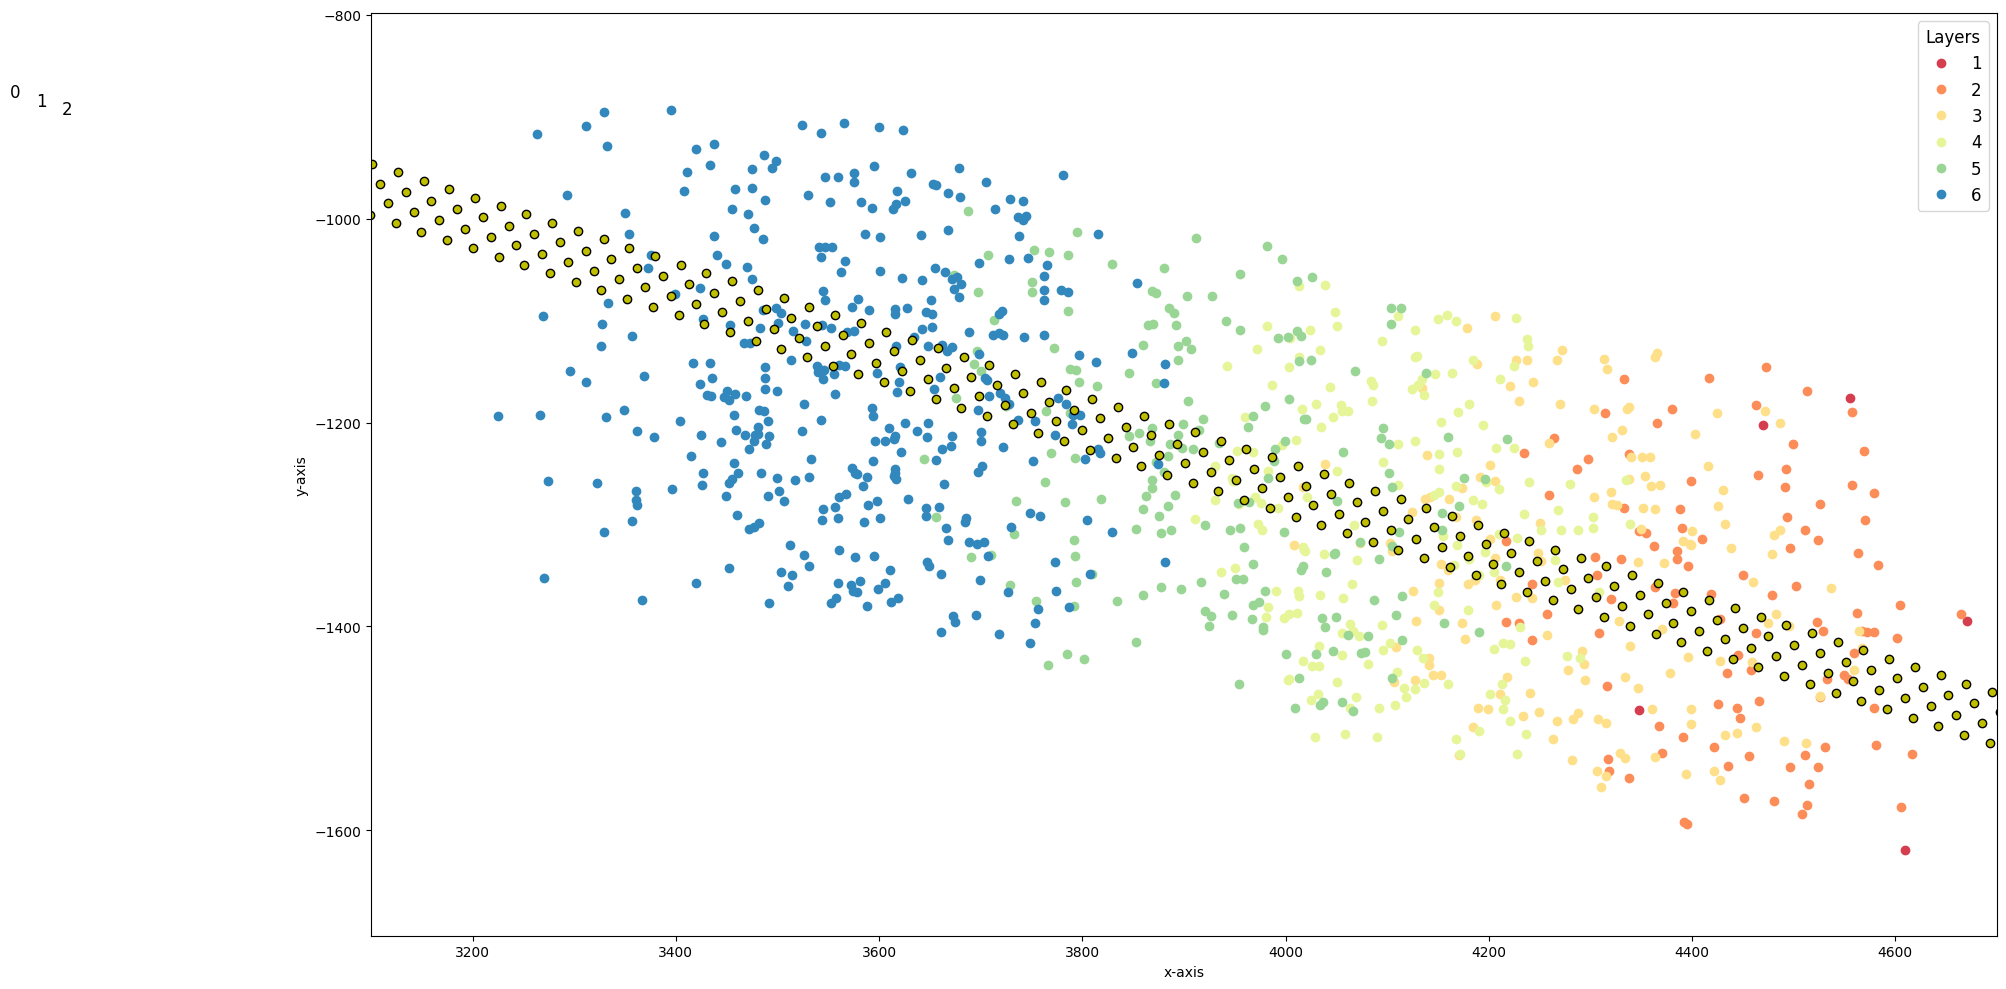

In [32]:
# Get coordinates of a sample of the column cells (else rendering last a while)
simulation = load_campaign_params(data_conf)
microcircuit = filter_microcircuit_cells(simulation)
microcircuit_coord = microcircuit["soma_location"].sample(
    n=1000, axis=0, random_state=1
)

# get cell layers
cell_layers = simulation["circuit"].cells.get(
    group=microcircuit["gid"], properties="layer"
)

simulation = load_campaign_params(data_conf)
microcircuit = filter_microcircuit_cells(simulation)

# angle view 4
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

# plot cells colored by layer
layer_color = [
    (0, 0, 0),
    (213 / 255, 62 / 255, 79 / 255),
    (252 / 255, 141 / 255, 89 / 255),
    (254 / 255, 224 / 255, 139 / 255),
    (230 / 255, 245 / 255, 152 / 255),
    (153 / 255, 213 / 255, 148 / 255),
    (50 / 255, 136 / 255, 189 / 255),
]

layers = np.sort(cell_layers.unique())

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.y[cell_layers == layer_i],
        ".",
        color=layer_color[int(layer_i)],
        markersize=12,
    )

# add contacts
ax.plot(
    Probe.contact_positions[:, 0],
    Probe.contact_positions[:, 1],
    marker=".",
    markersize=12,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)

# add contact ids
for ix in range(len(sum(Probe.contact_positions))):
    ax.text(
        Probe.contact_positions[ix, 0],
        Probe.contact_positions[ix, 1],
        "%s" % (str(Probe.contact_ids[ix])),
        size=12,
        zorder=100,
        color="k",
    )
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_xlim([3100, 4700])
plt.tight_layout()
legend = ax.legend(layers, fontsize=12, title="Layers")
plt.setp(legend.get_title(), fontsize=12)
plt.show()


# highlight order
# first site
ax.plot(
    Probe.contact_positions[0, 0],
    Probe.contact_positions[0, 1],
    "ro",
    markersize=10,
)

# highlight order
# second site
ax.plot(
    Probe.contact_positions[1, 0],
    Probe.contact_positions[1, 1],
    "bo",
    markersize=10,
)

# highlight order
# third site
ax.plot(
    Probe.contact_positions[2, 0],
    Probe.contact_positions[2, 1],
    "go",
    markersize=10,
)

Text(0, 0.5, 'y')

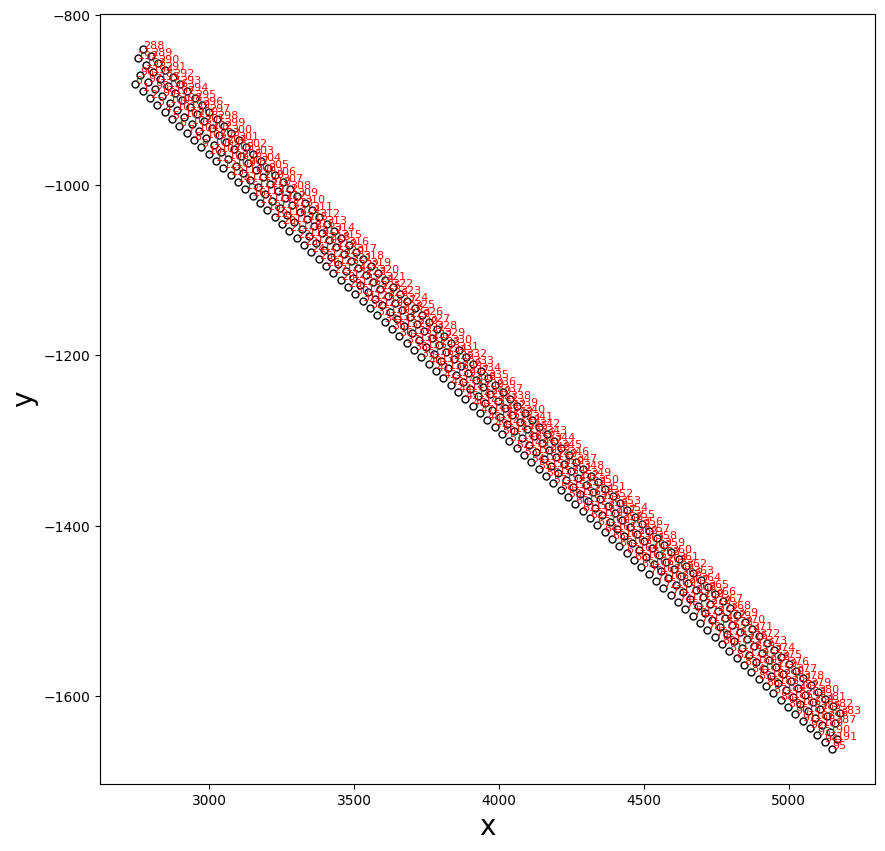

In [42]:
# plot file contact with ids
# fig, ax = plt.subplots(1, 1, figsize=(2, 10), mode="projection_3D")
# ax = plt.figure(figsize=(40, 80)).add_subplot(projection="3d")
fig, ax = plt.subplots(figsize=(10, 10))
# ax.view_init(0, -40, 0)

ax.plot(
    Probe.contact_positions[:, 0],
    Probe.contact_positions[:, 1],
    "o",
    markerfacecolor="w",
    color="k",
    markersize=5,
)
for ix in range(len(Probe.contact_positions)):
    if ix % 1 == 0:
        ax.text(
            Probe.contact_positions[ix, 0],
            Probe.contact_positions[ix, 1],
            "%s" % (str(contact_ids[ix])),
            size=8,
            zorder=100,
            color="r",
        )
ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("y", fontsize=20)

Our reconstructed coordinates

# References

(1) https://bbpgitlab.epfl.ch/nse/bluepy/-/blob/main/examples/ipython_notebooks/Usecase%201%20-%20Selecting%20cells%20from%20a%20circuit.ipynb 

(2) https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/index.html 

(3) https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/circuit.html 